# The Sparks Foundation

## Task 1 - Predict the percentage of an student based on the no. of study hours.
●	In this task we will predict the percentage of marks that a student is expected to score based upon the number of hours they studied.

●	Independent variable - Hours & Dependent variable - Percentage score

### Importing necessary libraries

In [162]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [164]:
url = 'http://bit.ly/w-data'
df = pd.read_csv(url)
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


####  Checking Info of the dataset

In [165]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [166]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


We can see that average hour student studies for 5 hour and scores 51.48 And a student studies for maximum of 9.2 hours and scores 95.

#### Check for null values

In [167]:
df.isnull().sum()

Hours     0
Scores    0
dtype: int64

#### Cheaking the Correlation 

In [168]:
df.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


#### Plotting how percentage scores varies with number of hours studied

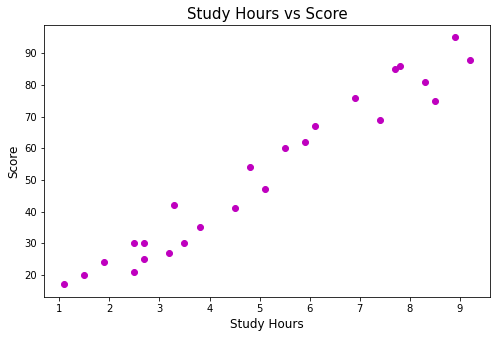

In [169]:
plt.figure(figsize=(8,5))
plt.scatter(df.Hours, df.Scores, color = 'm', marker = 'o')
plt.title('Study Hours vs Score', fontsize=15)
plt.xlabel('Study Hours', fontsize=12)
plt.ylabel('Score', fontsize=12)
plt.show()

#### Distribution of Hours and Score

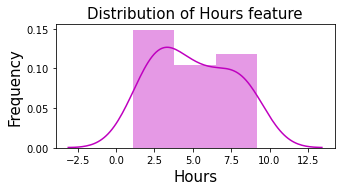

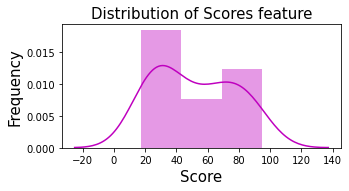

In [189]:
plt.figure(figsize=(5,5))
plt.subplot(2,1,1)
sns.distplot(df.Hours, color = 'm')
plt.title('Distribution of Hours feature',fontsize=15)
plt.xlabel('Hours', fontsize=15)
plt.ylabel('Frequency', fontsize=15)
plt.show()


plt.figure(figsize=(5,5))
plt.subplot(2,1,2)
sns.distplot(df.Scores, color = 'm')
plt.title('Distribution of Scores feature',fontsize=15)
plt.xlabel('Score', fontsize=15)
plt.ylabel('Frequency', fontsize=15)
plt.show()

● we can see that most of the student read around 2.5 to 4.0 hours

● we can see that most of the student get scores of 20 to 40% as most of them studied for less hours

#### Importing sklearn library 

In [171]:
X = df.iloc[:,:-1].values
y = df.iloc[:,1].values

In [172]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [173]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

In [175]:
model = LinearRegression()
model.fit(X_train, y_train) 

LinearRegression()

In [176]:
model.intercept_

2.649965189403865

In [177]:
model.coef_

array([9.81430544])

In [178]:
model.score(X_train, y_train)

0.9580702244504199

In [179]:
prediction = model.predict(X_test)

In [180]:
df_1=pd.DataFrame({'Actual':y_test,'Predicated':prediction})
df_1

,Actual,Predicated
0,20,17.371423
1,47,52.702923
2,42,35.037173
3,27,34.055743
4,41,46.814340


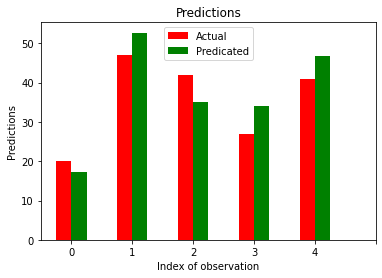

In [186]:
df_1.plot.bar(color=('red','green'))
plt.xlabel('Index of observation')
plt.ylabel('Predictions')
plt.title('Predictions')
plt.xticks(np.arange(len('Actual')), rotation =0)
plt.show()

## Prediction for 9.25 hours

In [187]:
hours = 9.25
scores = model.predict([[hours]])
print('Number of hours', hours)
print('Prediction Score', scores[0])

Number of hours 9.25
Prediction Score 93.43229053722453


## Evaluation of model

In [190]:
from sklearn import metrics
print('Mean Absolute Error:',metrics.mean_absolute_error(y_test, prediction))

print('Mean Squared Error:',metrics.mean_squared_error(y_test, prediction))

print('Root Mean Squared Error:',np.sqrt(metrics.mean_squared_error(y_test, prediction)))

Mean Absolute Error: 5.632881746692994
Mean Squared Error: 34.30075055068739
Root Mean Squared Error: 5.856684262506166
